In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
# Load the data
tweets_df=pd.read_csv("train.csv")
tweets_df # Display

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [30]:
tweets_df.info() #Info regarding the Data
tweets_df.describe() #Describes the Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [31]:
tweets_df['tweet'] #View just the column Tweet
tweets_df=tweets_df.drop(['id'], axis=1) #Drop the columns id

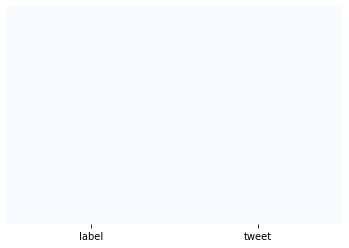

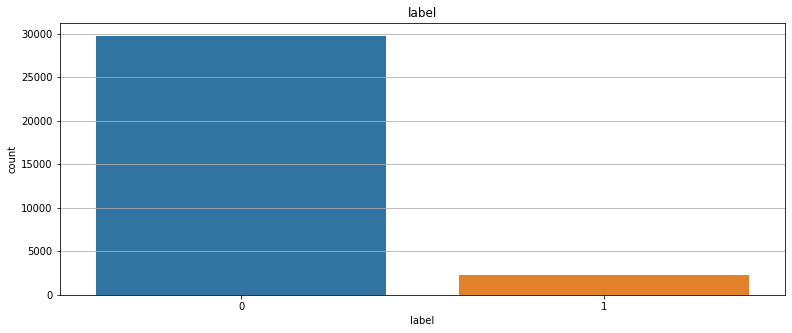

In [32]:
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues") #Checking Null values using Seaborn
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r') #Histogram depicting the Positive and Negative count of reviews
sns.countplot(x='label', data=tweets_df) #Positive and Negative Tweets Depection using Seaborn Countplot


In [33]:
#length of the messages
tweets_df['length']=tweets_df['tweet'].apply(len)


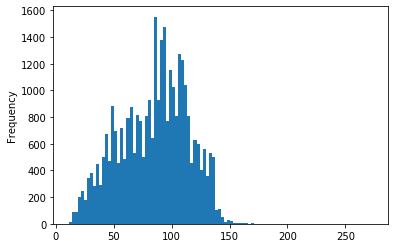

In [34]:
tweets_df['length'].plot(bins=100, kind='hist') #Frequency of Tweet Length 

In [35]:
tweets_df.describe()
# Let's see the shortest message 
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [36]:
#Classifying Postive and Negative Tweets
positive = tweets_df[tweets_df['label']==0]
negative = tweets_df[tweets_df['label']==1]


In [37]:
sentences = tweets_df['tweet'].tolist() #Combines all Tweets as a Single Tweet
Sentences_as_one_string=" ".join(sentences) #Removes Whitespaces and Joins the Tweets


In [38]:
#Creating a Wordcoud
!pip install WordCloud
from wordcloud import WordCloud

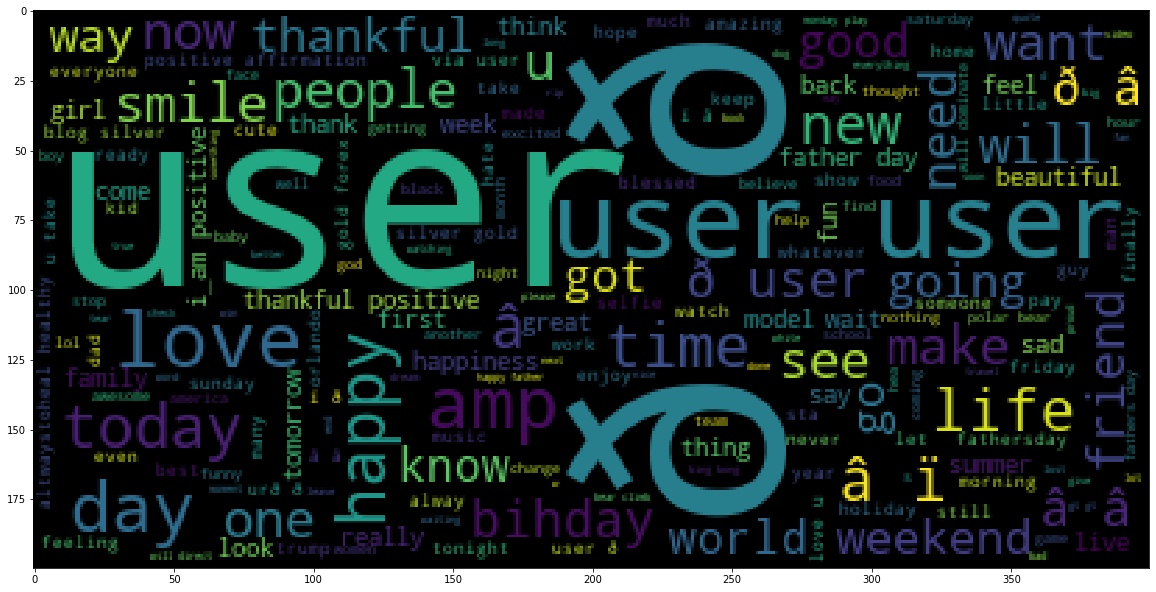

In [39]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(Sentences_as_one_string))

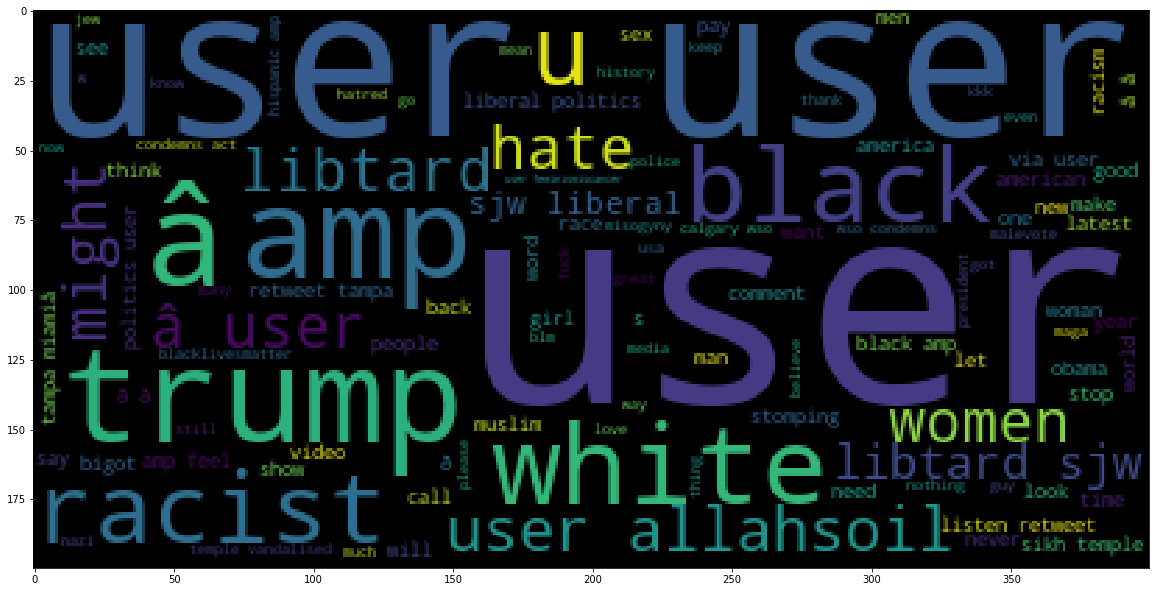

In [40]:
#Creating a Word cloud for Negative Terms
negative_list=negative['tweet'].tolist()
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

In [41]:
#Remove Punctuations
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
#Removal Of StopWords
import nltk # Natural Language tool kit 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english') #Displays all the English Stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
#CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [45]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)


In [46]:
print(tweets_df_clean[5]) # show the cleaned up version
print(tweets_df['tweet'][5]) # show the original version


['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']
[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning) 
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet']).toarray()


In [48]:

tweets_countvectorizer.shape #Shape (Dimension)

(31962, 47386)

In [49]:
X = tweets_countvectorizer
y = tweets_df['label']


In [50]:
#TRAIN A NAIVE BAYES CLASSIFIER MODEL
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Train-0.8, Test-0.2)

In [52]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
#ASSESS TRAINED MODEL PERFORMANCE
from sklearn.metrics import classification_report, confusion_matrix

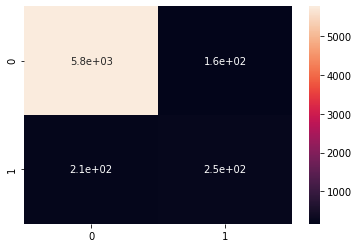

In [54]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)


In [55]:
print(classification_report(y_test, y_predict_test)) #Accuracy, Precision, Recall, F1 Value

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5935
           1       0.61      0.54      0.57       458

    accuracy                           0.94      6393
   macro avg       0.79      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393

